# Descriptive Analysis of MBA Students data
***
## Analysis of Two Continuous Variables
## Scatter Plot

In [1]:
# Import the required packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dropna(inplace = True)

Text(0, 0.5, 'Fare')

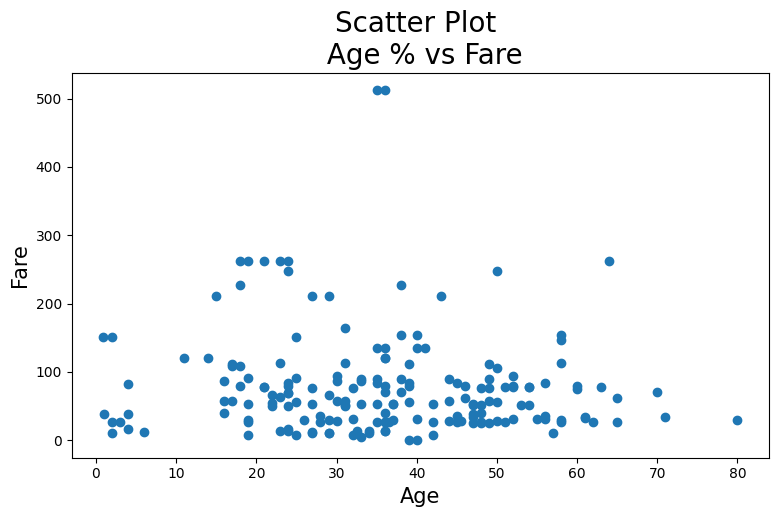

In [9]:
plt.figure(figsize=(9,5))
plt.scatter(x = df["Age"],
            y = df['Fare'])

plt.title("Scatter Plot \n Age % vs Fare", fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Fare', fontsize=15)

In [11]:
from scipy.stats import pearsonr
corr_1, pValue_1 = pearsonr(df["Age"], df['Fare'])

print('Pearsons Correlation:')
print('between Graduation Fare and Age is %.3f' % corr_1)


Pearsons Correlation:
between Graduation Fare and Age is -0.092


## Analysis of Two Categorical Variables
***
### Crosstab and Stacked Bar Plot

In [12]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [13]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

### Crosstab Analysis - Stream vs MBA Specialization

In [14]:
pd.crosstab(df['Survived'],
            df['Sex'],
            dropna = False,
            margins = True
           )

Sex,female,male,All
Survived,,,
0,6,54,60
1,82,41,123
All,88,95,183


### Row Proportions

In [16]:
row_prop_df = pd.crosstab(df['Sex'],
            df['Survived'],
            dropna = False,
            normalize = 'index'
           ).round(3)*100
row_prop_df = row_prop_df.reset_index()

row_prop_df

Survived,Sex,0,1
0,female,6.8,93.2
1,male,56.8,43.2


<AxesSubplot:>

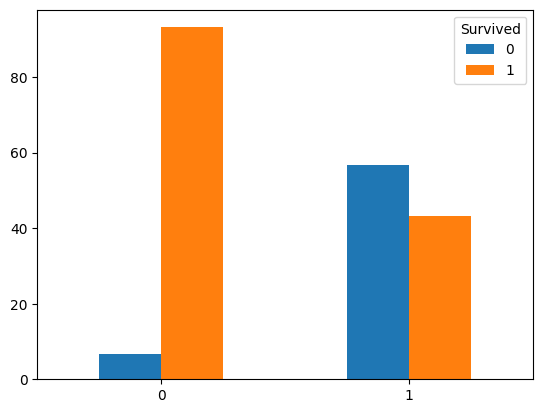

In [22]:
row_prop_df.plot.bar(rot=0)

### Column Proportions

In [ ]:
## To Do

## Analysis of a Categorical and a Continuous Variable

In [24]:
df['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [28]:
aggr = df.groupby(['Survived']).agg(
    {
        'Age' : ['count','mean'] #, 'min','max','sum'
    }
)

aggr

Age           
         count       mean
Survived                 
0           60  41.350000
1          123  32.905854

In [30]:
aggr.reset_index(inplace=True)
aggr.columns =  ["Survived" , "no_of_people", "mean_age_of_people"]
aggr

,Survived,no_of_people,mean_age_of_people
0,0,60,41.350000
1,1,123,32.905854


### Box Plot - Graduation Stream vs Work Experience 

Text(0, 0.5, 'Age')

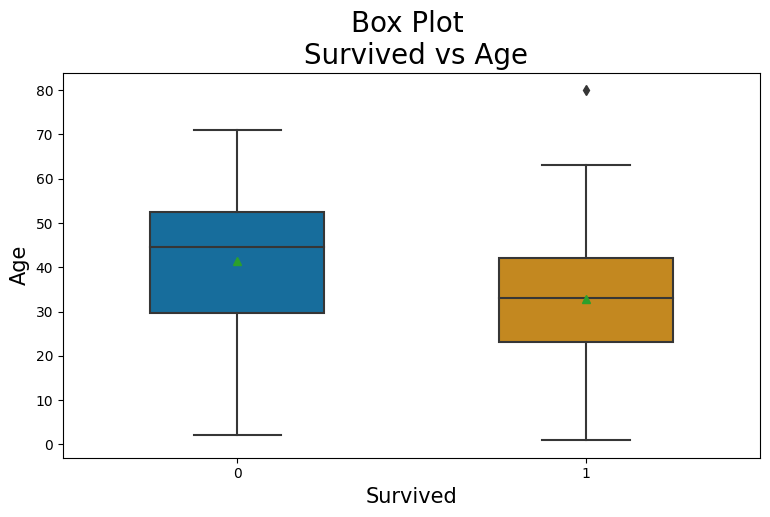

In [32]:
plt.figure(figsize=(9,5))
boxplot = sns.boxplot(
    x = 'Survived', # Graduation Stream
    y='Age',
    data=df, showmeans=True,
    width=0.5, 
    palette="colorblind")
plt.title("Box Plot \n Survived vs Age", fontsize=20)
plt.xlabel('Survived', fontsize=15)
plt.ylabel('Age', fontsize=15)

### Distribution Plot - Stream vs Work Experience

In [34]:
streams = list(df["Survived"].unique())
streams

[1, 0]

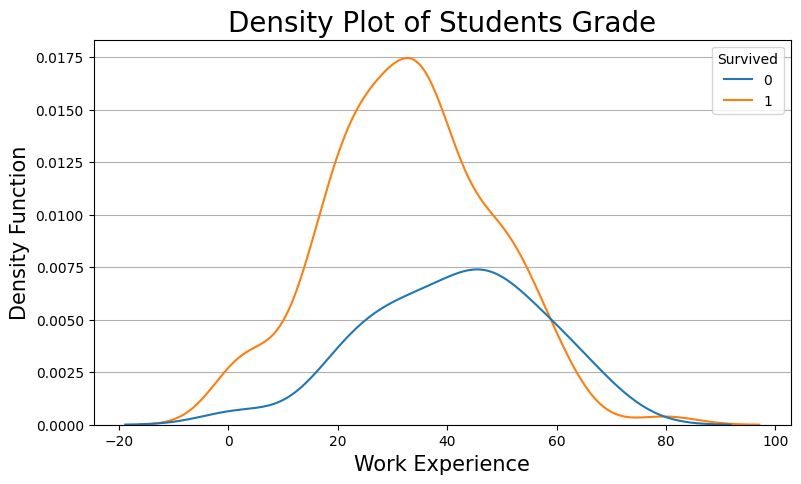

In [36]:
plt.figure(figsize=(9,5))
sns.kdeplot(x=df['Age'], hue=df['Survived'])
## KDE stands for Kernel Density Estimate

plt.title("Density Plot of Students Grade", fontsize=20)
plt.xlabel('Work Experience', fontsize=15)
plt.ylabel('Density Function', fontsize=15)
plt.grid(axis='y')

### Thank you